In [2]:
import pandas as pd
data = pd.read_csv(r'C:\Users\holar\Documents\Excel Project\retail_sales_dataset.csv')

In [3]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
print(data.head())
print(data.info())
print(data.describe())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [5]:
print(data.isnull().sum())  # Count of missing values per column
data.dropna(inplace=True)  # Remove rows with missing values (or use other strategies)
data.drop_duplicates(inplace=True)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [6]:
# Calculating mean, mode, and standard deviation
mean_age = data['Age'].mean()
mode_age = data['Age'].mode()[0]
std_age = data['Age'].std()

mean_quantity = data['Quantity'].mean()
mode_quantity = data['Quantity'].mode()[0]
std_quantity = data['Quantity'].std()

mean_price = data['Price per Unit'].mean()
mode_price = data['Price per Unit'].mode()[0]
std_price = data['Price per Unit'].std()

mean_total = data['Total Amount'].mean()
mode_total = data['Total Amount'].mode()[0]
std_total = data['Total Amount'].std()

# Display results
print(f"Age - Mean: {mean_age}, Mode: {mode_age}, Std Dev: {std_age}")
print(f"Quantity - Mean: {mean_quantity}, Mode: {mode_quantity}, Std Dev: {std_quantity}")
print(f"Price per Unit - Mean: {mean_price}, Mode: {mode_price}, Std Dev: {std_price}")
print(f"Total Amount - Mean: {mean_total}, Mode: {mode_total}, Std Dev: {std_total}")

Age - Mean: 41.392, Mode: 43, Std Dev: 13.681429659122532
Quantity - Mean: 2.514, Mode: 4, Std Dev: 1.1327343409145405
Price per Unit - Mean: 179.89, Mode: 50, Std Dev: 189.68135627129138
Total Amount - Mean: 456.0, Mode: 50, Std Dev: 559.997631555123


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
# Group by Date and sum up Total Amount to analyze daily trends
daily_sales = data.groupby('Date')['Total Amount'].sum().reset_index()

# Sort values by Date
daily_sales = daily_sales.sort_values('Date')

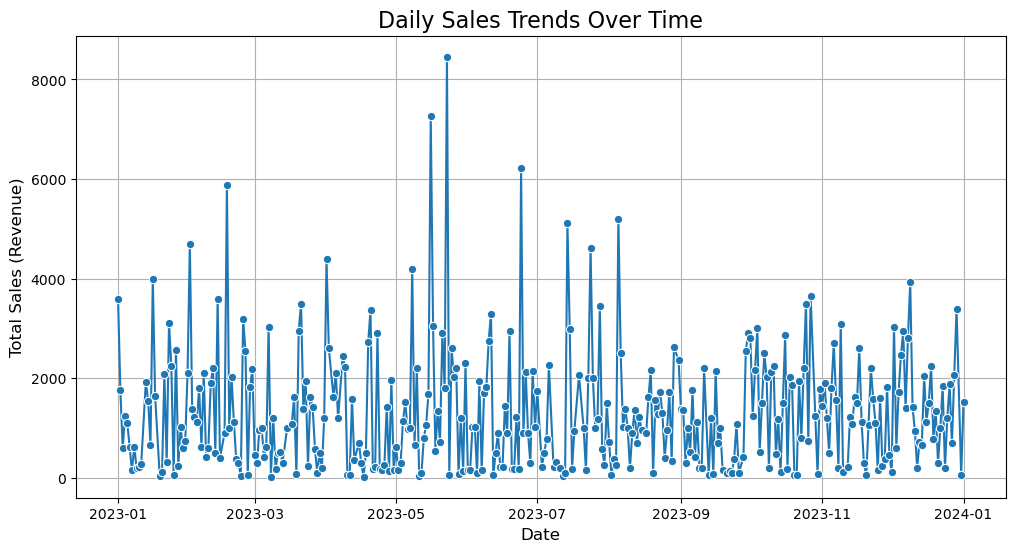

In [10]:
# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Amount', data=daily_sales, marker='o')
plt.title('Daily Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (Revenue)', fontsize=12)
plt.grid(True)
plt.show()

In [11]:
# 1. Customer demographics analysis
# Gender distribution
gender_distribution = data['Gender'].value_counts()

# Age distribution - plot age range counts
age_distribution = data['Age'].describe()  # Summary statistics for Age

# 2. Purchasing behavior analysis
# Total amount spent by each gender
gender_spending = data.groupby('Gender')['Total Amount'].sum()

# Total amount spent in each product category
category_spending = data.groupby('Product Category')['Total Amount'].sum()

# Purchase patterns based on age
age_purchase_pattern = data.groupby('Age')['Total Amount'].sum()

print("Gender Distribution: \n", gender_distribution)
print("\nAge Distribution: \n", age_distribution)
print("\nGender Spending: \n", gender_spending)
print("\nCategory Spending: \n", category_spending)
print("\nAge Purchase Pattern: \n", age_purchase_pattern)

Gender Distribution: 
 Gender
Female    510
Male      490
Name: count, dtype: int64

Age Distribution: 
 count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

Gender Spending: 
 Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

Category Spending: 
 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

Age Purchase Pattern: 
 Age
18    11215
19    14870
20     8645
21    12585
22    13700
23     8220
24     5415
25     9900
26    13980
27     9385
28     8670
29     6570
30     9790
31    10220
32     5550
33     6240
34    16785
35    11290
36     9105
37    11650
38    11100
39     4595
40     9415
41     5650
42     8500
43    17970
44     7560
45     6325
46    13090
47    12505
48     7240
49     5110
50     9845
51    16065
52     7040
53     9510
54    10505
55  

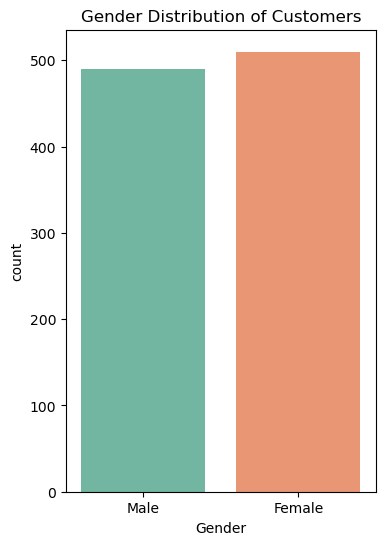

In [12]:
# 1. Gender Distribution Bar Plot
plt.figure(figsize=(4,6))
sns.countplot(data=data, x='Gender', palette='Set2', hue='Gender')
plt.title('Gender Distribution of Customers')
plt.show()

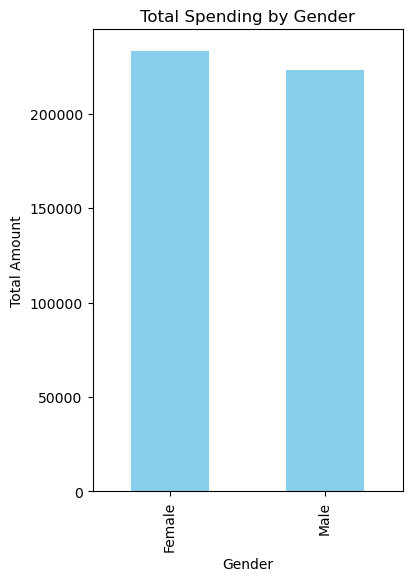

In [13]:
# 2. Total Spending by Gender Bar Plot
plt.figure(figsize=(4,6))
gender_spending.plot(kind='bar', color='skyblue')
plt.title('Total Spending by Gender')
plt.ylabel('Total Amount')
plt.xlabel('Gender')
plt.show()

In [25]:
#Total Spending by Product Category Heatmap
# filter numeric column only
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [26]:
corr_matrix = numeric_data.corr()

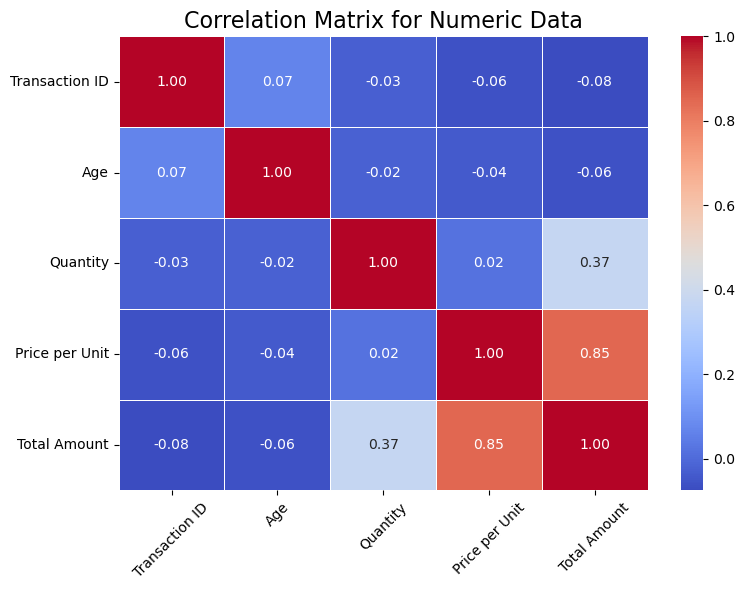

In [27]:
plt.figure(figsize=(8, 6))  
sns.heatmap(
    corr_matrix, 
    annot=True,            
    cmap='coolwarm',       
    fmt='.2f',             
    linewidths=0.5       
)

plt.title('Correlation Matrix for Numeric Data', fontsize=16)  
plt.xticks(fontsize=10, rotation=45)  
plt.yticks(fontsize=10)               
plt.tight_layout()                    
plt.show()